# Investigating how Mental Health Issues affect adults

In [68]:
import os 
import pandas as pd
import numpy as np 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Encoding
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# ML Prediction Libraries
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Ignore all warnings
import warnings
warnings.filterwarnings
warnings.filterwarnings("ignore")

## Importing the dataset
The dataset is comprised of 7 cvc files and I will be working on them as a group. Hence, I will load the folder of the dataset. 

In [69]:
#loading the path to the folder containing the dataset
folder_path = 'dataset'

files = os.listdir(folder_path)

In [70]:
# Filter the list to include only CSV files
csv_files = [file for file in files if file.endswith('.csv')]

# Load each CSV file into a DataFrame and store them in a list
dataframes = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Example: Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)



Considering that each csv files contains shared data, I had to contatenate the files into a single dataframe. 

## Data cleaning and Preparation
Here we look at the data and understand what it contains. This section will perform various tasks such as descibing the data, filling empty cells and converting varibles into the correct data type. It will also delete columns that we will not need in the analysis. 

After loading the dataset, we went ahead to check the names of the columns 

In [71]:
#displaying column names
display(combined_df.columns.values)

array(['Entity', 'Code', 'Year', 'Major depression', 'Bipolar disorder',
       'Eating disorders', 'Dysthymia', 'Schizophrenia',
       'Anxiety disorders',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders',
       'DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders',
       'Nearly every day', 'More than half the days', 'Several days',
       'Not at all',
       'Number of countries with primary data on prevalence of mental disorders',
       'Potentially adequate treatment, conditional',
       'Other treatments, conditional', 'Untreated, conditional',
       'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
       'Depressive disorders (

I then went ahead to see the decription of the rows and columns by listing the first 10 rows at the beginning and the last 10 rows at the end of the dataset. 

In [72]:
# Display the combined DataFrame
print(combined_df.head(10))


                       Entity Code  Year  Major depression  Bipolar disorder  \
0        Andean Latin America  NaN  2008               0.0               0.0   
1                Asia Pacific  NaN  2008              80.8               3.8   
2                 Australasia  NaN  2008             100.0             100.0   
3                   Caribbean  NaN  2008               9.1               0.0   
4                Central Asia  NaN  2008               0.0               0.0   
5              Central Europe  NaN  2008              16.0               0.0   
6       Central Latin America  NaN  2008              49.8              34.5   
7  Central Sub-Saharan Africa  NaN  2008               0.0               0.0   
8                   East Asia  NaN  2008              12.2               8.4   
9     East Sub-Saharan Africa  NaN  2008               1.3               0.9   

   Eating disorders  Dysthymia Schizophrenia  Anxiety disorders  \
0               0.0        0.0             0        

In [73]:
#displaying the last 10 
print(combined_df.tail(10))

         Entity Code  Year  Major depression  Bipolar disorder  \
13345  Zimbabwe  ZWE  2010               NaN               NaN   
13346  Zimbabwe  ZWE  2011               NaN               NaN   
13347  Zimbabwe  ZWE  2012               NaN               NaN   
13348  Zimbabwe  ZWE  2013               NaN               NaN   
13349  Zimbabwe  ZWE  2014               NaN               NaN   
13350  Zimbabwe  ZWE  2015               NaN               NaN   
13351  Zimbabwe  ZWE  2016               NaN               NaN   
13352  Zimbabwe  ZWE  2017               NaN               NaN   
13353  Zimbabwe  ZWE  2018               NaN               NaN   
13354  Zimbabwe  ZWE  2019               NaN               NaN   

       Eating disorders  Dysthymia Schizophrenia  Anxiety disorders  \
13345               NaN        NaN           NaN                NaN   
13346               NaN        NaN           NaN                NaN   
13347               NaN        NaN           NaN            

I went ahead to descibbe the dataset using the describe function

In [74]:
combined_df.describe()

,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Anxiety disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders,...,Not at all,Number of countries with primary data on prevalence of mental disorders,"Potentially adequate treatment, conditional","Other treatments, conditional","Untreated, conditional",Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
count,13355.000000,44.000000,22.000000,22.000000,22.000000,22.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,10.000000,15.000000,26.000000,26.000000,26.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
mean,2004.539948,28.995455,15.931818,14.577273,17.372727,34.181818,652.215475,171.090876,137.930619,42.392972,...,76.310000,56.733333,8.653846,16.365385,74.980769,0.266604,3.767036,4.101840,0.636968,0.195664
std,8.648371,32.841373,28.352431,25.455918,29.174127,35.825870,183.643326,26.234514,51.197175,29.394380,...,13.162949,46.172760,5.073557,6.570415,10.238087,0.039383,0.925286,1.050543,0.233391,0.138380
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,243.097840,119.913380,39.438133,9.671199,...,49.100000,2.000000,0.000000,6.900000,54.900000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,1997.000000,1.300000,0.000000,0.000000,0.000000,0.925000,506.857413,155.950035,112.140244,20.837689,...,74.050000,31.000000,3.425000,11.100000,68.800000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,2005.000000,15.250000,2.750000,0.000000,0.850000,23.900000,640.099150,175.115100,124.228445,31.430651,...,76.000000,41.000000,9.800000,15.250000,76.400000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,2012.000000,47.000000,14.100000,18.200000,23.050000,63.925000,765.842910,183.999005,184.438120,55.850353,...,82.475000,63.000000,11.975000,20.575000,82.550000,0.286575,4.366252,4.564164,0.844406,0.251167
max,2019.000000,100.000000,100.000000,89.800000,100.000000,100.000000,1427.423600,291.100100,325.152800,218.704390,...,96.600000,172.000000,16.100000,34.600000,91.800000,0.462045,7.645899,8.624634,1.506730,1.031688


### Shape of the dataset
I then went ahead to check on the shape of the dataset 

In [75]:
# Checking the shape of the data
print(combined_df.shape)


(13355, 27)


Based on the shape of the dataset, there are 13,355 rows and 27 columns. I will go ahead and reduce the number of rows as there are some information that is not needed in our analysis such as DALYS rates. But first I will run the info function to see what the dataset contains and the specific data types. 

In [76]:
print (combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13355 entries, 0 to 13354
Data columns (total 27 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             13355 non-null  object 
 1   Code                                                                               12321 non-null  object 
 2   Year                                                                               13355 non-null  int64  
 3   Major depression                                                                   44 non-null     float64
 4   Bipolar disorder                                                                   22 non-null     float64
 5   Eating disorders                                                                   22 non-null     flo

In [77]:
#checking the number of unique values in columns
print(combined_df.nunique())

Entity                                                                                287
Code                                                                                  205
Year                                                                                   30
Major depression                                                                       18
Bipolar disorder                                                                       14
Eating disorders                                                                       11
Dysthymia                                                                              14
Schizophrenia                                                                          14
Anxiety disorders                                                                      18
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders       6835
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia              6834
DALYs (rat

In [78]:
# Display basic statistics for the depression and anxiety columns
print(combined_df[['Major depression', 'Anxiety disorders']].describe())

       Major depression  Anxiety disorders
count         44.000000          22.000000
mean          28.995455          34.181818
std           32.841373          35.825870
min            0.000000           0.000000
25%            1.300000           0.925000
50%           15.250000          23.900000
75%           47.000000          63.925000
max          100.000000         100.000000


## Cleaning the code and filling in the missing values
when running combined_df.head() and combined_df.tail(), the code variable has some NaN, I am going to clean the data and fill in the missing values

### checking the data types of the set

In [79]:
combined_df.dtypes

Entity                                                                                object
Code                                                                                  object
Year                                                                                   int64
Major depression                                                                     float64
Bipolar disorder                                                                     float64
Eating disorders                                                                     float64
Dysthymia                                                                            float64
Schizophrenia                                                                         object
Anxiety disorders                                                                    float64
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders       float64
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophreni

In [80]:
combined_df.isnull().sum()

Entity                                                                                   0
Code                                                                                  1034
Year                                                                                     0
Major depression                                                                     13311
Bipolar disorder                                                                     13333
Eating disorders                                                                     13333
Dysthymia                                                                            13333
Schizophrenia                                                                        13333
Anxiety disorders                                                                    13333
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders        6515
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia               6515

Initially running the dataframe showed NaNs in all the variables. We then go ahead and fill in the missing values with the calculated mean. 

In [81]:
#filling the empty cells in Major Depression by first calculating the mean
mean = combined_df['Major depression'].mean()

#filling the empty cells in Major depression with the calculated mean
combined_df['Major depression'].fillna(mean, inplace=True)

In [82]:
#filling the empty cells in Anxiety disorders by first calculating the mean
mean = combined_df['Anxiety disorders'].mean()

#filling the empty cells in Anxiety disorders with the calculated mean
combined_df['Anxiety disorders'].fillna(mean, inplace=True)

In [83]:
combined_df.isnull().sum()

Entity                                                                                   0
Code                                                                                  1034
Year                                                                                     0
Major depression                                                                         0
Bipolar disorder                                                                     13333
Eating disorders                                                                     13333
Dysthymia                                                                            13333
Schizophrenia                                                                        13333
Anxiety disorders                                                                        0
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders        6515
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia               6515

In [84]:
# Checking for duplicates
combined_df[combined_df.duplicated()]

,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,...,Not at all,Number of countries with primary data on prevalence of mental disorders,"Potentially adequate treatment, conditional","Other treatments, conditional","Untreated, conditional",Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized


There are no duplicated values in our dataframe. 

### Dropping some columns 
There are some columns that does not affect the target variable, hence I will drop them 

In [93]:
#creating a list of all the columns I want to drop
columns_to_drop = ['Nearly every day', 'More than half the days', 'Several days', 'Not at all', 'Untreated, conditional', 'Potentially adequate treatment, conditional','Other treatments, conditional']

#calling the drop 
combined_df.drop(columns=columns_to_drop, inplace=True)

#checking if it has been dropped 
combined_df.head()


,Entity,Code,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Schizophrenia,Anxiety disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders,Number of countries with primary data on prevalence of mental disorders,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Andean Latin America,NaN,2008,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Asia Pacific,NaN,2008,80.8,3.8,23.1,1.0,71.6,93.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australasia,NaN,2008,100.0,100.0,16.4,100.0,85.1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Caribbean,NaN,2008,9.1,0.0,0.0,0.0,28.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Central Asia,NaN,2008,0.0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reduced the number of columns to 20 to help better the analysis. 

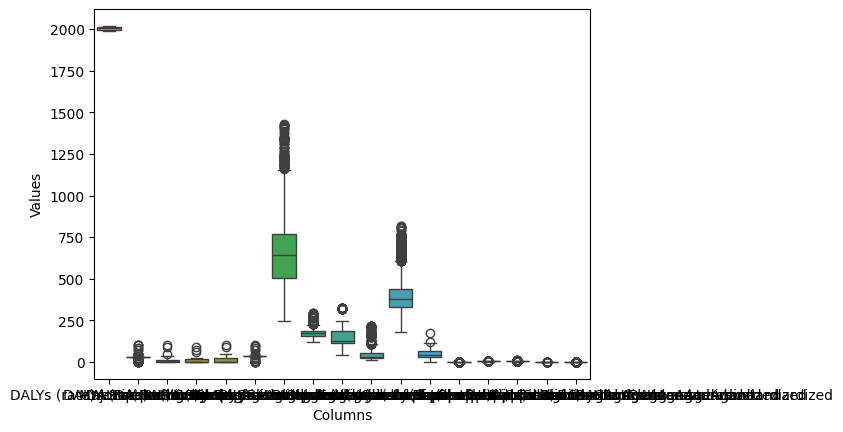

In [94]:
#Check for existing outliers in the numerical data
sns.boxplot(combined_df)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

## Data spliting

In [86]:
#Creating a copy of the data for encoding 
combined_df1=combined_df.copy()

### Removing unwanted columns

# Label Encoding

In [87]:
combined_df1['Entity'].unique()

array(['Andean Latin America', 'Asia Pacific', 'Australasia', 'Caribbean',
       'Central Asia', 'Central Europe', 'Central Latin America',
       'Central Sub-Saharan Africa', 'East Asia',
       'East Sub-Saharan Africa', 'Eastern Europe',
       'North Africa/Middle East', 'North America', 'Oceania',
       'South Asia', 'Southeast Asia', 'Southern Latin America',
       'Southern Sub-Saharan Africa', 'Tropical Latin America',
       'West Sub-Saharan Africa', 'Western Europe', 'World',
       'Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde

In [88]:
label_encoder = LabelEncoder()

# Encode labels in column 'gender'. 
combined_df1['Entity']= label_encoder.fit_transform(combined_df1['Entity'])


In [89]:
#Checking if it has been encoded [gender]
combined_df1['Entity'].unique() 

array([  9,  19,  21,  53,  55,  56,  57,  58,  81,  83,  85, 186, 187,
       195, 237, 242, 243, 244, 262, 280, 281, 283,   0,   2,   3,   5,
         7,  10,  11,  13,  16,  17,  22,  23,  26,  27,  28,  29,  30,
        32,  33,  34,  35,  36,  37,  39,  40,  41,  42,  43,  44,  46,
        47,  48,  49,  50,  52,  54,  59,  60,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  77,  78,  79,  82,  84,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  98, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 148, 151, 153, 154, 156, 157, 158, 159,
       160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 188, 189,
       190, 191, 192, 193, 194, 196, 199, 200, 201, 202, 203, 20

### CHecking Correlation between variables

In [90]:
# Step 1: Select numerical columns
numerical_cols = combined_df1.select_dtypes(include=['int', 'float'])

# Step 2: Compute correlation matrix
correlation_matrix = numerical_cols.corr()
correlation_matrix 

,Entity,Year,Major depression,Bipolar disorder,Eating disorders,Dysthymia,Anxiety disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,...,Not at all,Number of countries with primary data on prevalence of mental disorders,"Potentially adequate treatment, conditional","Other treatments, conditional","Untreated, conditional",Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
Entity,1.000000,-1.925516e-03,-6.444648e-04,-0.001323,0.043759,-0.034450,4.587008e-03,-0.082455,0.069796,-0.107512,...,0.164208,-0.342236,-0.003446,0.176318,-0.111447,0.039250,-0.080258,-0.051505,-0.116487,-0.070602
Year,-0.001926,1.000000e+00,9.290729e-17,NaN,NaN,NaN,5.905010e-18,-0.050276,0.028259,0.004605,...,NaN,NaN,-0.147264,0.034395,0.050905,0.024728,-0.049007,0.029486,0.003478,0.076266
Major depression,-0.000644,9.290729e-17,1.000000e+00,0.806979,0.680074,0.779241,6.243936e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bipolar disorder,-0.001323,NaN,8.069790e-01,1.000000,0.568619,0.967097,6.817817e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eating disorders,0.043759,NaN,6.800737e-01,0.568619,1.000000,0.547261,6.348158e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dysthymia,-0.034450,NaN,7.792408e-01,0.967097,0.547261,1.000000,6.530478e-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anxiety disorders,0.004587,5.905010e-18,6.243936e-01,0.681782,0.634816,0.653048,1.000000e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders,-0.082455,-5.027638e-02,NaN,NaN,NaN,NaN,NaN,1.000000,-0.433923,0.244559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia,0.069796,2.825921e-02,NaN,NaN,NaN,NaN,NaN,-0.433923,1.000000,0.087265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder,-0.107512,4.604955e-03,NaN,NaN,NaN,NaN,NaN,0.244559,0.087265,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Regression Model to check the relationship between Churn, gender, contract and Phone service
# Extract features (independent variables) and target (dependent variable)
X = combined_df1[['Major depression', 'Anxiety disorders']]  
y = combined_df1['Entity']  

# Create a LinearRegression object
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Make predictions (optional)
# predictions = model.predict(X_new)  # X_new is a DataFrame or array-like structure of new data points

# Access coefficients and intercept (optional)
intercept = model.intercept_
coefficients = model.coef_

# Get the names of the features
feature_names = X.columns

# Construct the linear regression equation
equation = f"Entity = {intercept:.2f}"
for feature, coefficient in zip(feature_names, coefficients):
    equation += f" + {coefficient:.2f} * {feature}"

print("Linear Regression Equation:")
print(equation)

# Print coefficients and intercept
print("Intercept:", intercept)
print("Coefficients:", coefficients)


Linear Regression Equation:
Entity = 139.42 + -0.25 * Major depression + 0.46 * Anxiety disorders
Intercept: 139.42220355576214
Coefficients: [-0.24902791  0.46453333]


In [92]:
#Logistic regression 

# Create a LogisticRegression object
logistic_model = LogisticRegression()

# Fit the model to your data
logistic_model.fit(X, y)

# Make predictions (optional)
# predictions = logistic_model.predict(X_new)  # X_new is a DataFrame or array-like structure of new data points

# Access coefficients and intercept (optional)
intercept_logistic = logistic_model.intercept_[0]
coefficients_logistic = logistic_model.coef_[0]

# Print coefficients and intercept
print("Intercept (Logistic Regression):", intercept_logistic)
print("Coefficients (Logistic Regression):", coefficients_logistic)


Intercept (Logistic Regression): 0.0008694357997561608
Coefficients (Logistic Regression): [0.01760815 0.01255131]
